<a href="https://colab.research.google.com/github/A01793146/iayaa-Equipo-48/blob/main/Equipo03_semana10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Procesamiento de Lenguaje Natural (NLP)**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Semana 10**

## **Equipo 3**
## **Alumnos**
## Alejandro Jesús Vázquez Navarro A01793146
## Estefanía Abigail Belmont Castro A01332636
## Juan Carlos García Rendón Martínez A01793708
## Vladimir Salazar Altamirano A01793118
## Jorge Ariel Bermúdez Tellería A01793818

###**Actividad: GPT y Web-Scraping**

En la actividad de esta semana trabajarás en equipos mediante el uso del Transformer GPT y
comentarios de usuarios obtenidos mediante WebScraping en Tripadvisor.


A través de Tripadvisor ( https://www.tripadvisor.es/ ) en español obtendremos los comentarios de
usuarios sobre su experiencia en un hotel en particular. En esta plataforma se evalúa la experiencia
mediante puntos de 1 a 5, que corresponden de manera ascendente a “Pésimo”, “Malo”, “Normal”,
“Muy bueno” y “Excelente”.


Una de las formas en que se han venido utilizando los generadores de texto como el GPT, es para
generar datos sintéticos de texto que no tengan problemas de privacidad. En particular en esta actividad
los usaremos para generar datos sintéticos sobre comentarios positivos y negativos de usuarios y
posteriormente los usaremos para ver si ayudan a mejor el desempeño de un modelo de clasificación.


De la siguiente liga de Tripadvisor selecciona un hotel en la zona de la ciudad de Monterrey, México, que
consideres adecuado para extraer los comentarios de español y evaluaciones de usuarios:
https://www.tripadvisor.es/Hotels-g150782-Monterrey_Northern_Mexico-Hotels.html


En particular trata de seleccionar algún hotel cuyas calificaciones consideres desbalanceadas, al verlo
como un problema binario: **Positivo (4, 5) y Negativo (1, 2 3)**.

**1.** Mediante web scraping realiza una **extracción de los comentarios y calificaciones** a dicho hotel.

Recuerda que Tripadvisor representa las calificaciones mediante círculos verdes.

Los
comentarios deben ser de usuarios que los redactaron en idioma en **español**.

**Indica la
cantidad de comentarios y sus calificaciones que extrajiste.**

In [53]:
import requests
import re
import pandas as pd

from bs4 import BeautifulSoup as soup



url = 'https://www.tripadvisor.es/Hotel_Review-g150782-d9137890-Reviews-Fiesta_Americana_Monterrey_Pabellon_M-Monterrey_Northern_Mexico.html'

html = requests.get(url,
                    headers={"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"}
                    )

print(html.status_code)     # la salida "200" solo es el status de que hubo respuesta con la página indicada.

200


In [6]:
links = []

max_or_num = 600  # El valor de max_or_num es el mayor múltiplo de 5 menor al total de reseñas en español.
                 # Como en este caso, al momento de hacer el web-scraping se tenían 53 comentarios en español,
                 # el valor de max_or_num sería 50.


reviews_x_pages = 5    # tienes que verificar si van de 10 en 10, o 5 en 5 las reseñas en cada página, porque cada caso es diferente....

for k in range(0, max_or_num, reviews_x_pages):
  a = url
  if k == 0:
    ss = '{}'     # Para la primera página es el -or con valor vacío.
  else:
    ss = str(k)  # convertimos a string el valor numérico.
  a = a[:(a.find('Reviews')+7)] + '-or' + ss + a[(a.find('Reviews')+7):]  # Los índices de "Reviews" van de 0 a 6, ya que tiene 7 letras.
  links.append(a)


links

['https://www.tripadvisor.es/Hotel_Review-g150782-d9137890-Reviews-or{}-Fiesta_Americana_Monterrey_Pabellon_M-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d9137890-Reviews-or5-Fiesta_Americana_Monterrey_Pabellon_M-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d9137890-Reviews-or10-Fiesta_Americana_Monterrey_Pabellon_M-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d9137890-Reviews-or15-Fiesta_Americana_Monterrey_Pabellon_M-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d9137890-Reviews-or20-Fiesta_Americana_Monterrey_Pabellon_M-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d9137890-Reviews-or25-Fiesta_Americana_Monterrey_Pabellon_M-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d9137890-Reviews-or30-Fiesta_Americana_Monterrey_Pabellon_M-Monterrey_Northern_Mexico.html',


In [3]:
from random import randint
from time import sleep

In [ ]:
import re

In [8]:
reviews = []
stars =[]


numpages = int( max_or_num / reviews_x_pages )                    # puede tardar varios minutos si son muchos registros a extraer.

for link in links[0:numpages]:
  print(link)

  headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36' }
  html2 = requests.get(link, headers=headers)
  #print(html2.status_code)

  sleep(randint(1,5))   # se incluyen intervalos de sleep para que no se estén haciendo llamadas de manera continua a la página
                        # y que al detectar esta actividad continua, se pueda detectar como una actividad sospechosa por el servidor
                        # y nos pueda bloquear de manera automática por ello.
  bsobj2 = soup(html2.content,'lxml')   # objeto de la librería BeautifulSoup para llevar a cabo nuestra tarea.

  # Extraemos los comentarios de cualquiera de las siguientes dos formas:
  # Incluimos algunos Print solo para visualizar la manera en que se lleva a cabo el proceso:

  #for review in bsobj2.findAll('span', class_='QewHA'):       # Forma 1:  Estamos en "span", Observa el guión-bajo al final de "class_"
  for review in bsobj2.findAll('span', {'class' : 'QewHA'}):   # Forma 2
      print(review.text)
      reviews.append(review.text.strip())

  sleep(randint(1,5))
  bsobj3 = soup(html2.content,'lxml')

  # Extraigamos también las calificaciones (estrellas):
  # Observa que las calificaciones están en unidades de 10, 20, 30, 40, 50.
  # En particular en este caso haremos la extracción de todo el string donde se encuentra la
  # calificación al hotel por parte del usuario y a partir de ahí mediante regex puedes
  # fácilmente realizar la extracción de la calificación:
  for cal in bsobj3.findAll('div', {'class' : 'Hlmiy'}):
    print(cal)
    #  Aquí puedes incluir tu regex para extraer solo la calificación numérica.
    stars.append(cal)


https://www.tripadvisor.es/Hotel_Review-g150782-d9137890-Reviews-or{}-Fiesta_Americana_Monterrey_Pabellon_M-Monterrey_Northern_Mexico.html
Hotel con muy buena vista a la CD, es muy silencioso y cómodo, es sencillo llegar a la habitación, es muy cómoda. Tiene lo necesario para hospedarse de primera, el aire acondicionado funciono a la perfección, el baño es adecuado y espacioso, la reseña me pidió evaluar la alberca, pero no me informaron de que contenía alberca y la descripción del hotel tampoco se mencionó que tenía, por lo demás excelente 
Desde que llegamos la atención fue excelente por parte del personal, lo que extraño es el servicio de valet parking, ya que aunque tienen un área reservado para el hotel, es un poco complicado llegar.
Las instalaciones del hotel están muy bien cuidadas, pasillos, habitaciones y en general todo el hotel tiene un olor espectacular, cuidan detalles que otros no lo harían. El servicio de room service bueno aunque un poco limitado en las opciones del me

Cantidad de comentarios extraídos: 600
Cantidad de claificaciones: 600


[<div class="Hlmiy F1" data-test-target="review-rating"><span class="ui_bubble_rating bubble_50"></span></div>,
 <div class="Hlmiy F1" data-test-target="review-rating"><span class="ui_bubble_rating bubble_50"></span></div>,
 <div class="Hlmiy F1" data-test-target="review-rating"><span class="ui_bubble_rating bubble_40"></span></div>,
 <div class="Hlmiy F1" data-test-target="review-rating"><span class="ui_bubble_rating bubble_50"></span></div>,
 <div class="Hlmiy F1" data-test-target="review-rating"><span class="ui_bubble_rating bubble_50"></span></div>,
 <div class="Hlmiy F1" data-test-target="review-rating"><span class="ui_bubble_rating bubble_50"></span></div>,
 <div class="Hlmiy F1" data-test-target="review-rating"><span class="ui_bubble_rating bubble_50"></span></div>,
 <div class="Hlmiy F1" data-test-target="review-rating"><span class="ui_bubble_rating bubble_50"></span></div>,
 <div class="Hlmiy F1" data-test-target="review-rating"><span class="ui_bubble_rating bubble_10"></span>

In [62]:

type(stars) == list

padron = r'bubble_(\d+)'

lst_Stars = [(o)[0] for w in stars if (o:=re.findall(padron, str(w)))]
lst_Stars = [int((x)[0]) for x in lst_Stars]
lst_Stars

#Armamos el dataset final

zipped = list(zip(reviews, lst_Stars))
df = pd.DataFrame(zipped, columns=['review', 'stars'])

df.head()

print('Cantidad de comentarios extraídos:', len(reviews))
print('Cantidad de claificaciones:', len(stars))

print(f'5 primeros registros {df.head()}')


Cantidad de comentarios extraídos: 600
Cantidad de claificaciones: 600
5 primeros registros                                               review  stars
0  Hotel con muy buena vista a la CD, es muy sile...      5
1  Desde que llegamos la atención fue excelente p...      5
2  Las instalaciones del hotel están muy bien cui...      4
3  Una experiencia muy placentera, excelente serv...      5
4  Pabellón M es increíble, tener la posibilidad ...      5


**2.** Para considerarlo como un problema binario, **convierte las calificaciones a valores de 0
(comentario negativo) y 1 (comentario positivo).**

**a.** En particular indica cómo considerarás las calificaciones entre 3 y 4, como 3.5, por
ejemplo.

Justifica la decisión tomada.

**b.** Indica la proporción de comentarios positivos y negativos que tienes ahora

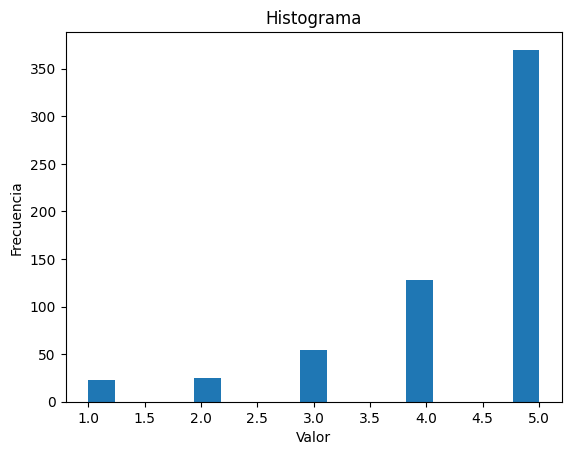

In [69]:
import matplotlib.pyplot as plt

def convierteBinario(calificacion):
  calificacion = int(calificacion)

  if calificacion >0 and calificacion <4:
    return 0
  else:
    calificacion >3 and calificacion <=5
    return 1

df["calificacion"] =df.apply(lambda x: convierteBinario(x["stars"]), axis=1)

plt.hist(df[""], bins="auto")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma")

plt.show()

Aquí podemos ver una gran proporción de calificaciones con 5 puntos, sin embargo despúes de hacer la transformación a "0" y "1" la proporción quedo:


Proporción de comentarios negativos 0.17
Proporción de comentarios positivos 0.83


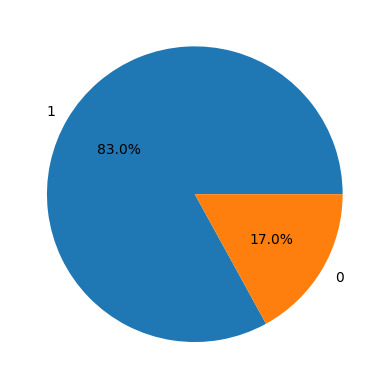

In [82]:
print(f'Proporción de comentarios negativos {len(df[df["calificacion"]==0])/len(df)}')
print(f'Proporción de comentarios positivos {len(df[df["calificacion"]==1])/len(df)}')

conteo = df["calificacion"].value_counts()
valores = list(conteo.values)

porcentaje = 100 * conteo / len(df)
etiquetas = list(porcentaje.index)

plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
plt.show()

Claramente nuestro dataset está **desbalanceado**

**3.** Selecciona y aplica un modelo Transformer generador de texto en español de la plataforma
de HuggingFace para “balancear” los porcentajes de comentarios positivos y negativos.

Indica la cantidad de datos sintéticos que vas a generar, en particular contesta las siguientes
preguntas:

**a.** ¿Vas a generar solo datos de la clase negativa minoritaria o de ambas clases? ¿Por
qué?

**b.** ¿Qué porcentaje de nuevo balanceo de clases vas a generar? ¿Por qué?

**NOTA:**
Recuerda que no siempre es lo mejor balancearlos al 50% cada clase, porque si el
conjunto original está demasiado desbalanceado y los datos sintéticos generados son
de muy buena calidad, los resultados obtenidos al final podrían ser bastante
desastrosos.

**4.** Realiza una partición de los datos en entrenamiento, validación y prueba con los porcentajes
que consideres adecuados.

**5.** Mediante un Transformer que consideres adecuado para idioma español de la plataforma
HuggingFace, **aplica un modelo de clasificación binaria (análisis de sentimiento)** para los
datos originales, es decir, sin incluir los comentarios sintéticos.

¿Qué desempeño obtienes?

**NOTA:** Justifica el procedimiento utilizado. Es decir, podrías utilizar un modelo Transformer
de manera directa (out-of-box), en cuyo caso la evaluación la haces de manera directa sobre
el conjunto entrenamiento+validación. O bien, usar un modelo Transformer con fine-tuning
en cuyo caso entrenas con el conjunto de entrenamiento y validas con el de prueba.


En cuanto al Transformer a utilizar, está **“PlanTL-GOB-ES/gpt2-large-bne”** de la versión de
MarIA, pero puedes utilizar algún otro si lo consideras adecuado.

**6.** Ahora realiza el entrenamiento y evaluación de los conjuntos aumentados (reales más
sintéticos).

En este caso sí aplica un modelo con fine-tuning. ¿Por qué en este caso no se
justificaría utilizar la técnica out-of-box para entrenar y evaluar directamente los datos con
los comentarios sintéticos?

**7.** Compara los resultados e incluye tus comentarios. En particular, indica si consideras que los
comentarios sintéticos fueron de ayuda en este caso.